In [1]:
import pandas as pd 
import yfinance as yf
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300

df = yf.download('AAPL',
                 start = '1999-12-31',
                 end= '2010-12-31')

d1 = pd.DataFrame(df['Adj Close'])
d1.rename(columns={'Adj Close':'adj_close'}, inplace=True)

d1['simple_rtn']=d1.adj_close.pct_change()
d1.head()

[*********************100%***********************]  1 of 1 completed


,adj_close,simple_rtn
Date,,
1999-12-31,0.781300,NaN
2000-01-03,0.850643,0.088753
2000-01-04,0.778926,-0.084310
2000-01-05,0.790324,0.014633
2000-01-06,0.721931,-0.086538


In [2]:
d1[['mean', 'std']] = d1['simple_rtn'].rolling(window=21).agg(['mean', 'std'])
d1.dropna(inplace=True)
d1

,adj_close,simple_rtn,mean,std
Date,,,,
2000-02-01,0.761827,-0.033735,0.000327,0.056730
2000-02-02,0.750903,-0.014339,-0.004582,0.053036
2000-02-03,0.785100,0.045541,0.001601,0.050798
2000-02-04,0.820722,0.045373,0.003065,0.051628
2000-02-07,0.866792,0.056134,0.009859,0.048543
...,...,...,...,...
2010-12-23,9.836496,-0.004797,0.002274,0.008078
2010-12-27,9.869325,0.003337,0.001496,0.007040
2010-12-28,9.893340,0.002433,0.001582,0.007040


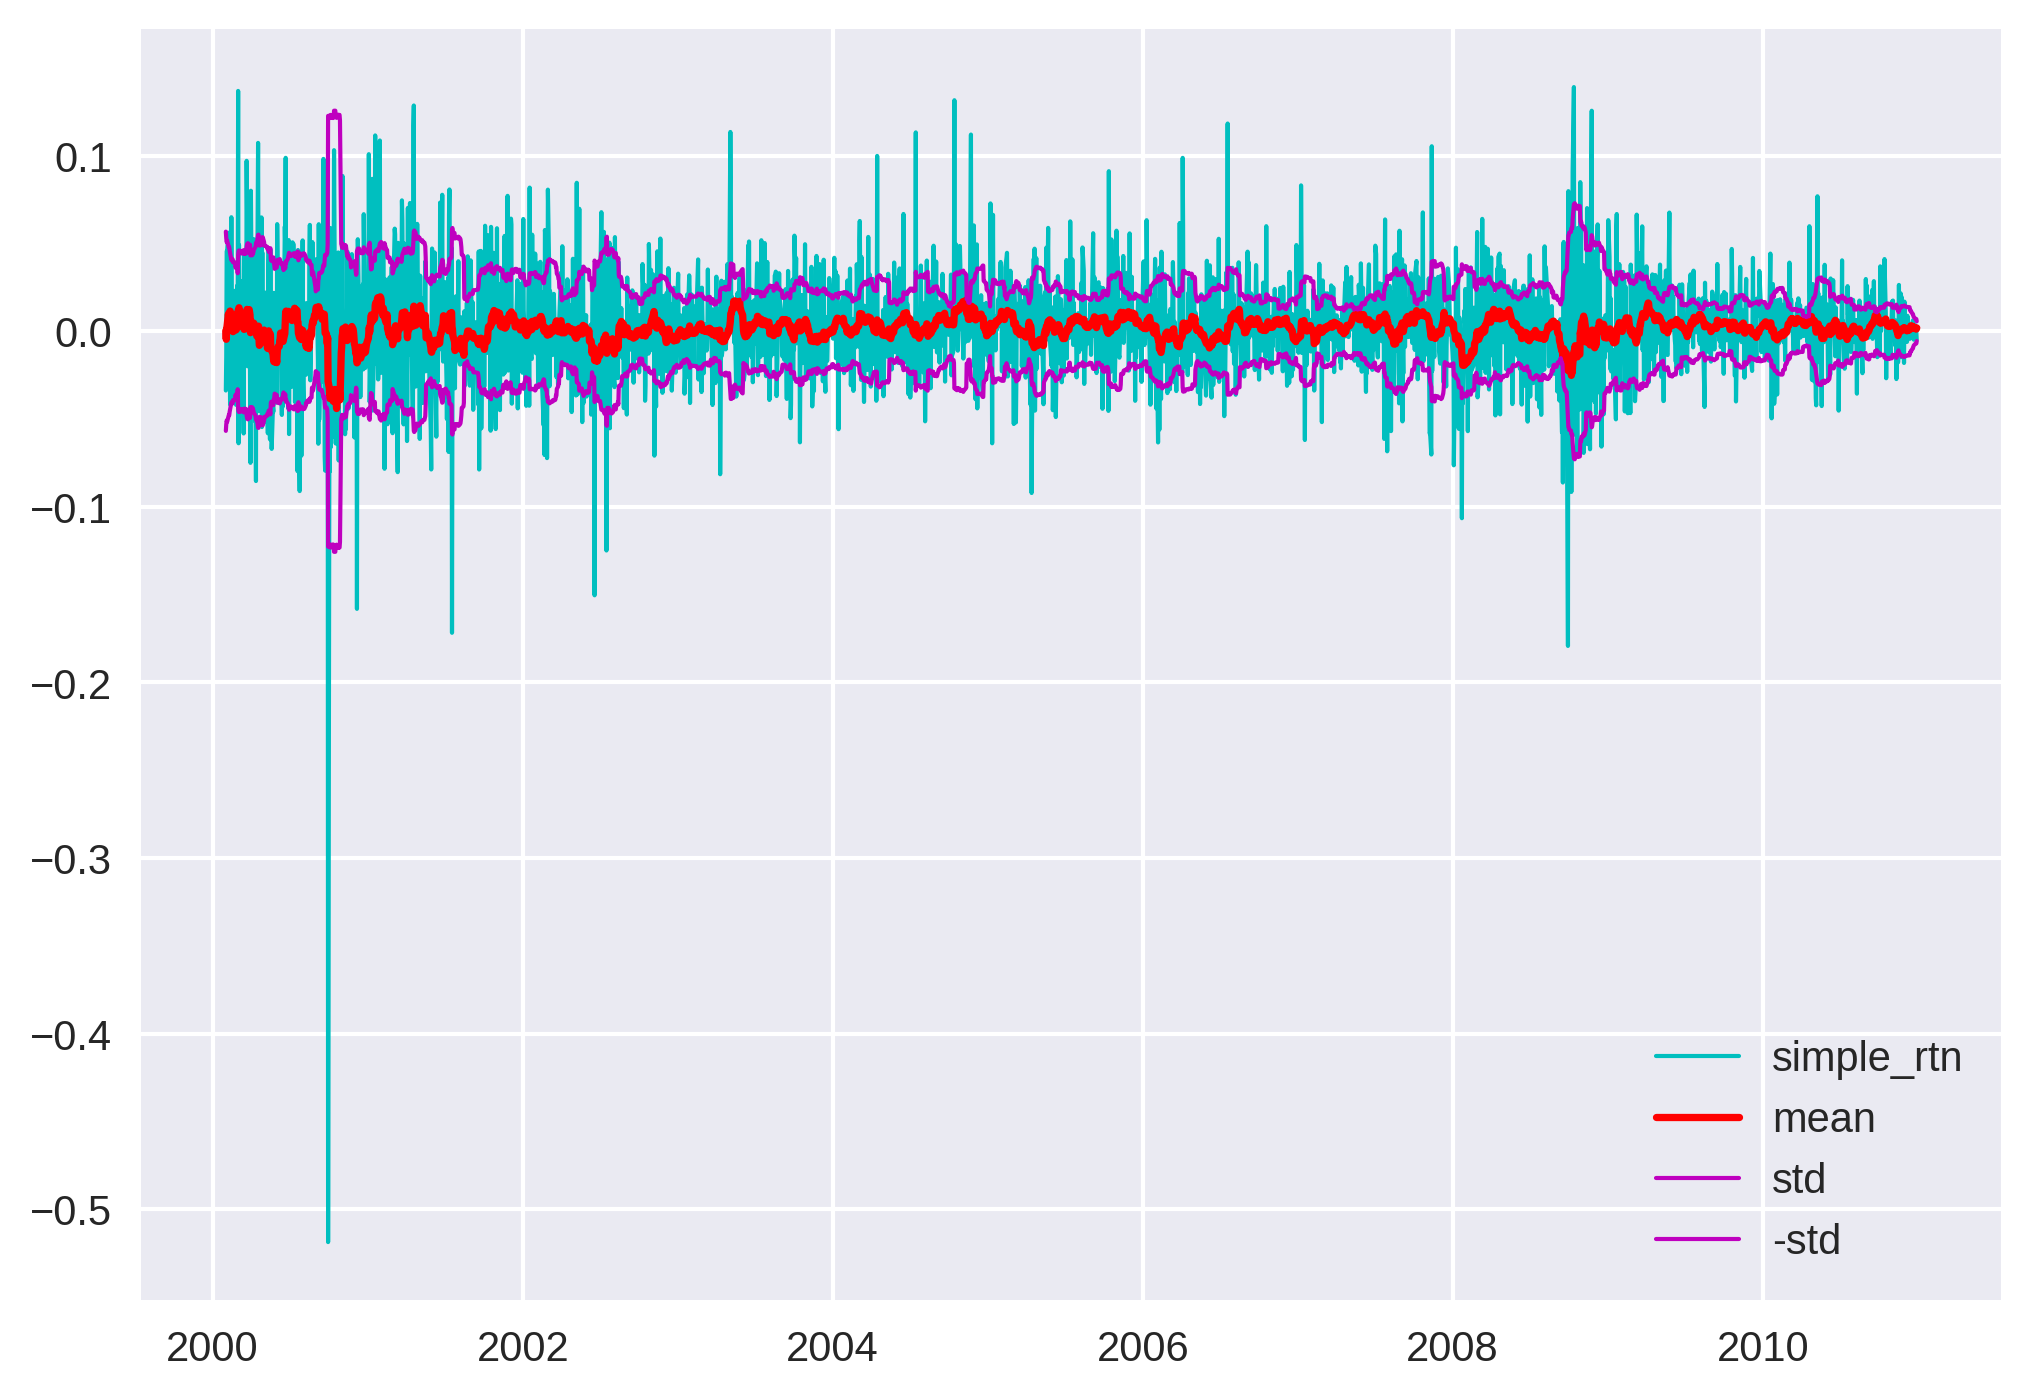

In [3]:
fig, ax = plt.subplots()

ax.plot(d1.index, d1['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d1.index, d1['mean'], label= 'mean',c='r')
ax.plot(d1.index, d1[ 'std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d1.index, -d1['std'],label='-std', linestyle='-',c='m', lw=1)
ax.legend(loc='lower right')

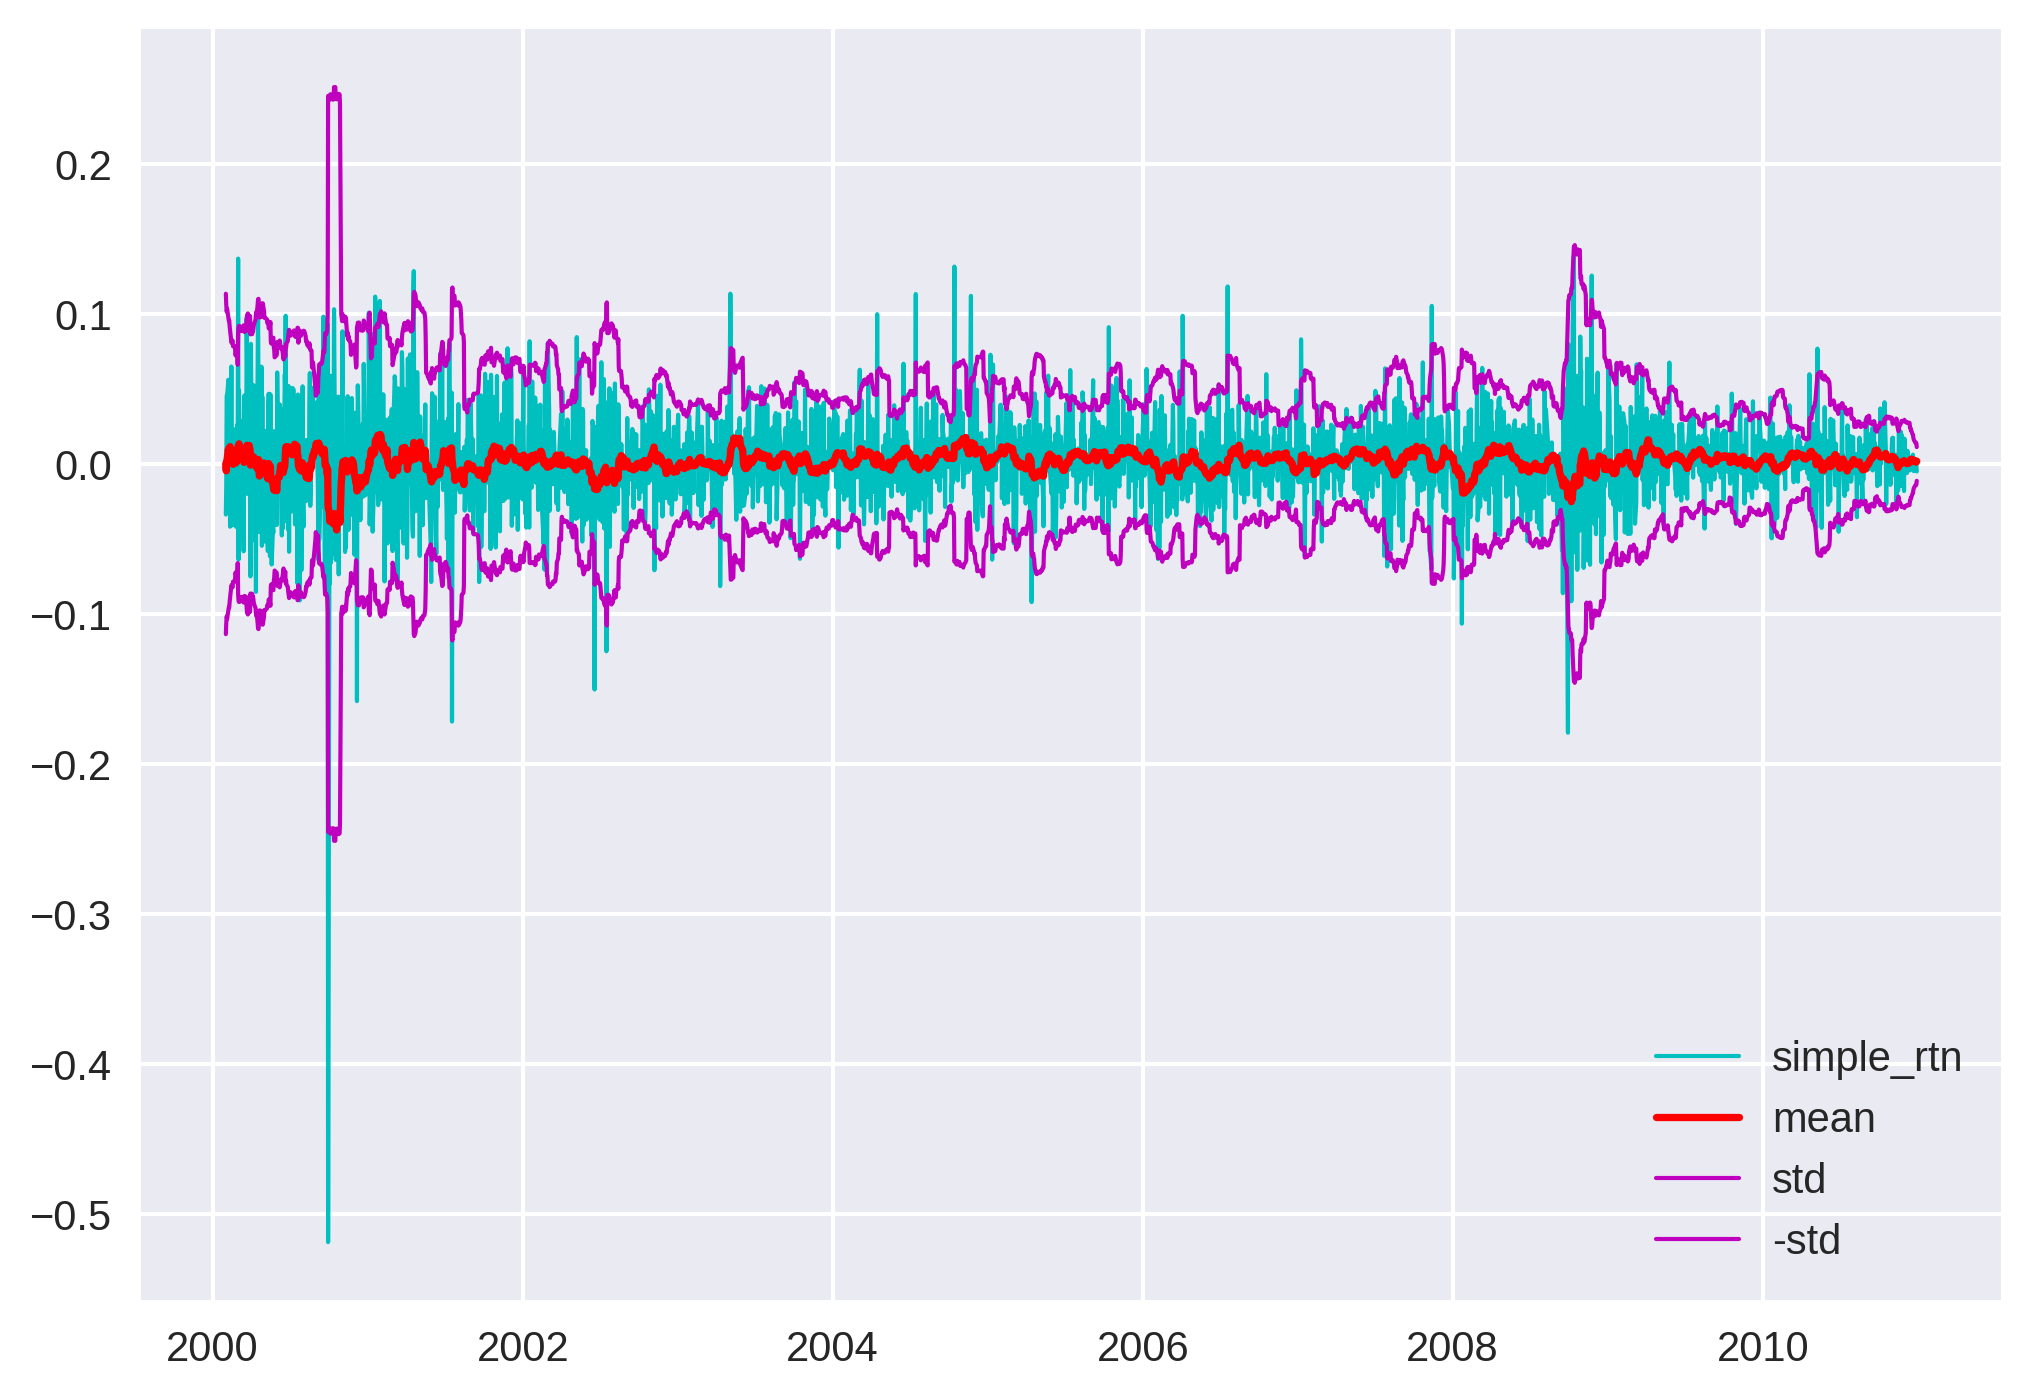

In [4]:
fig, ax = plt.subplots()
#d1.plot(use_index=True)
#d1[['simple_rtn', 'mean', 'std', 'std']].plot(ax=ax)
ax.plot(d1.index, d1['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d1.index, d1['mean'], label= 'mean',c='r')
ax.plot(d1.index, 2*d1['std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d1.index, -2*d1['std'],label='-std', linestyle='-',c='m', lw=1)
ax.legend(loc='lower right')

In [6]:
n_sigmas=2
cond = (d1['simple_rtn'] > d1['mean'] + d1['std']*n_sigmas) | (d1['simple_rtn'] < d1['mean'] - d1['std']*n_sigmas)
d1['outlier'] = np.where(cond, 1, 0)

outliers = d1.loc[d1['outlier'] == 1, ['simple_rtn']]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2000-03-01 to 2010-11-18
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simple_rtn  127 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


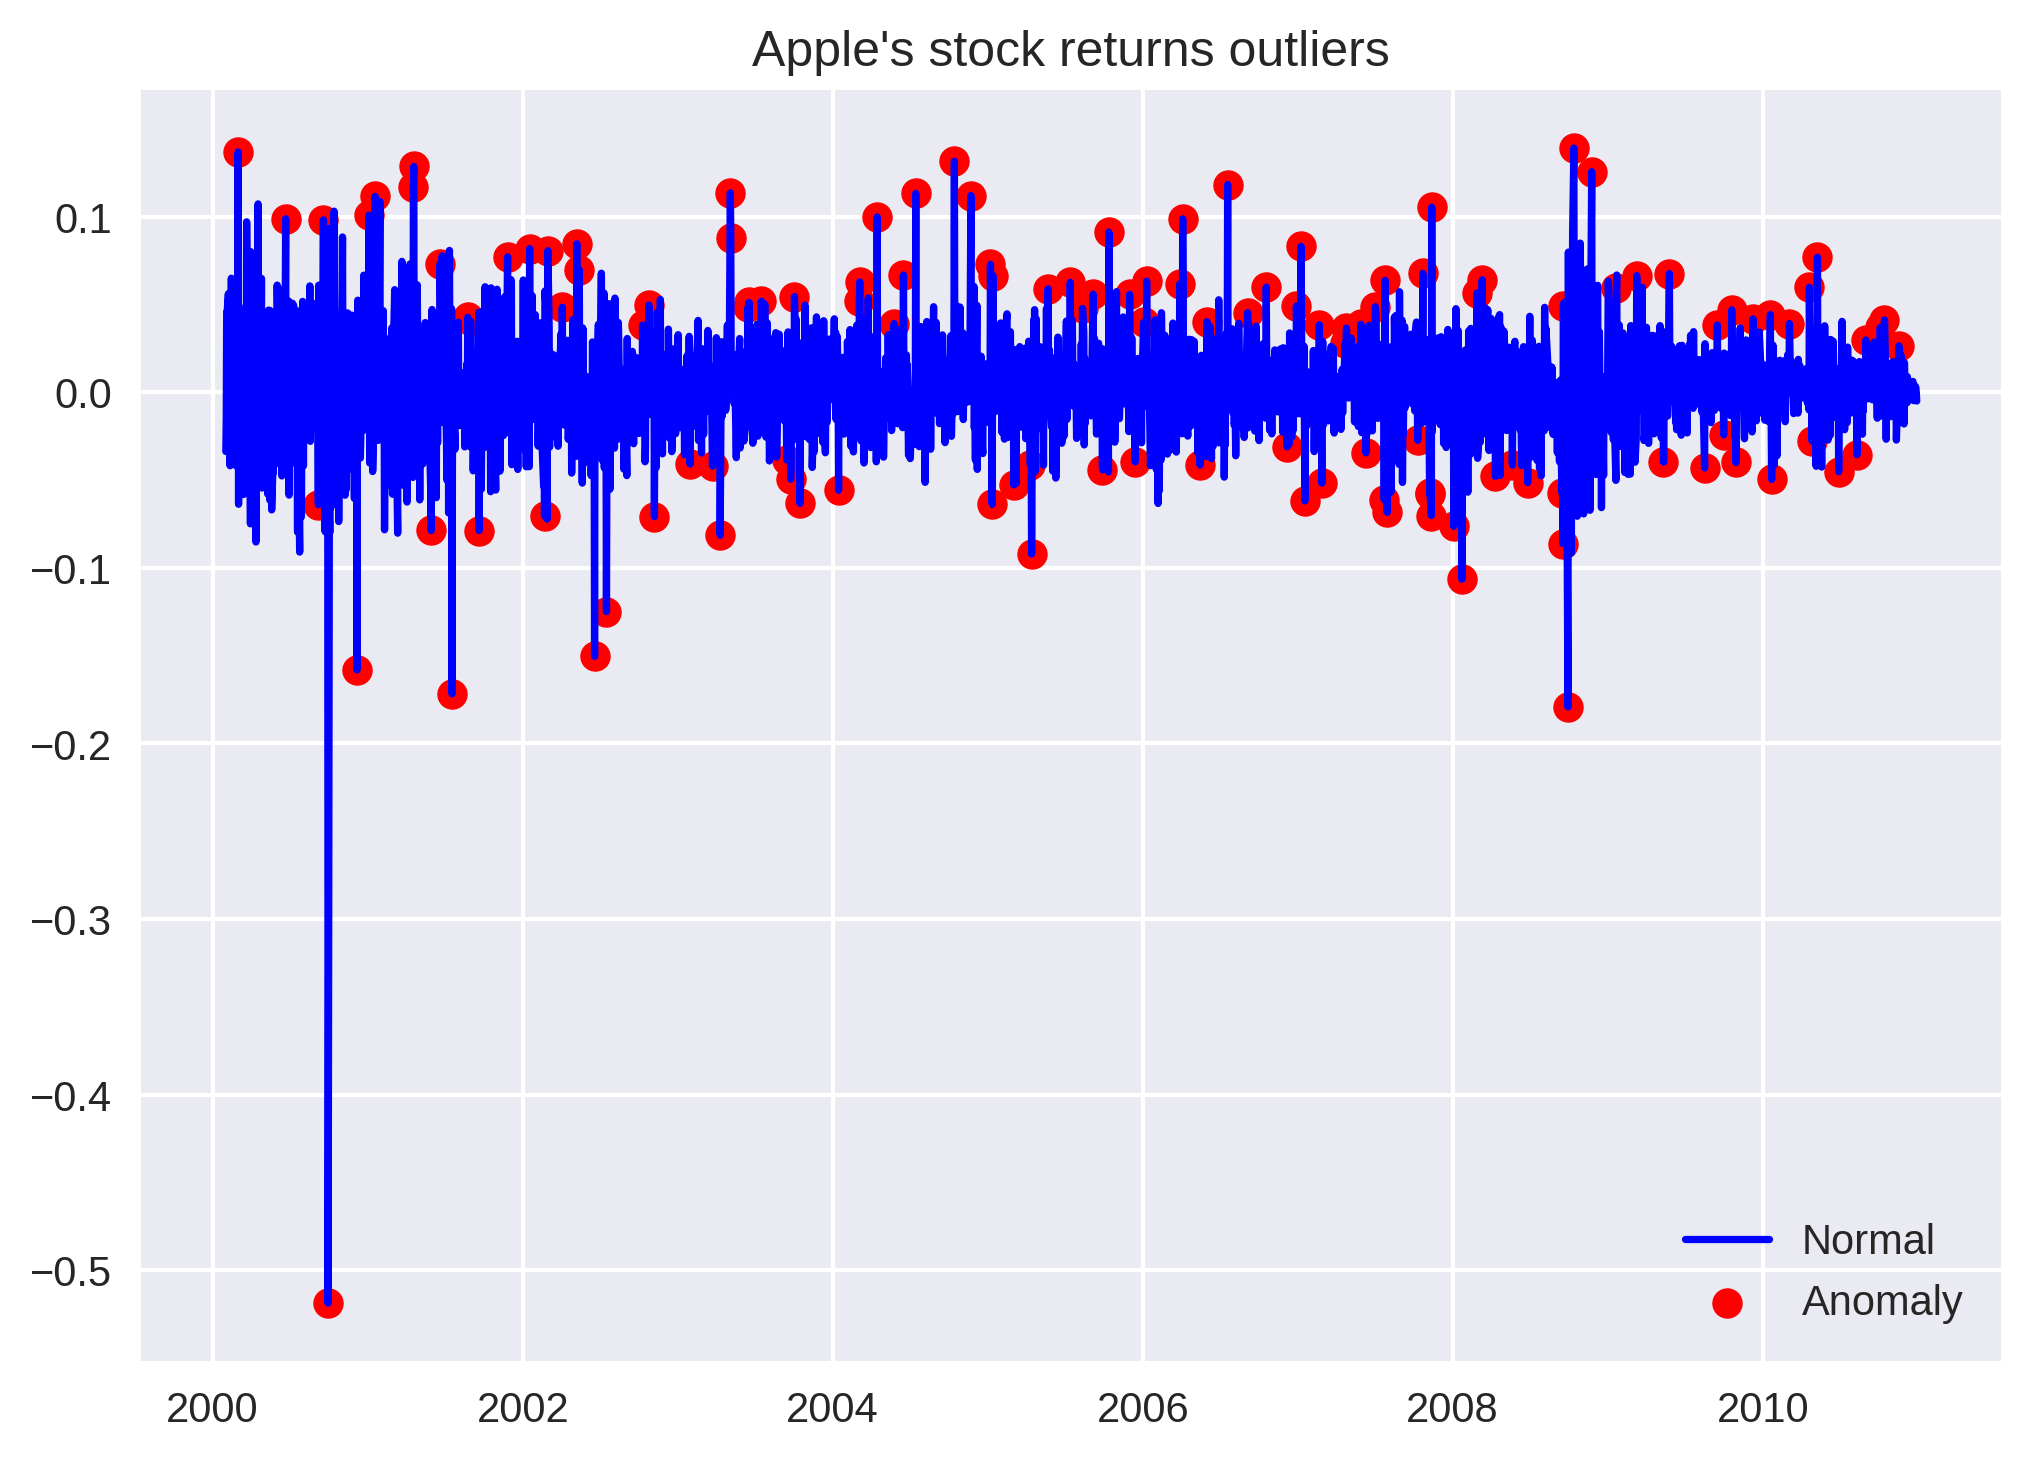

In [7]:
fig, ax = plt.subplots()
ax.plot(d1.index, d1.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns outliers")
ax.legend(loc='lower right')

In [8]:
n_sigmas=2.5
cond = (d1['simple_rtn'] > d1['mean'] + d1['std']*n_sigmas) | (d1['simple_rtn'] < d1['mean'] - d1['std']*n_sigmas)
d1['outlier'] = np.where(cond, 1, 0)

outliers = d1.loc[d1['outlier'] == 1, ['simple_rtn']]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2000-03-01 to 2010-08-11
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simple_rtn  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


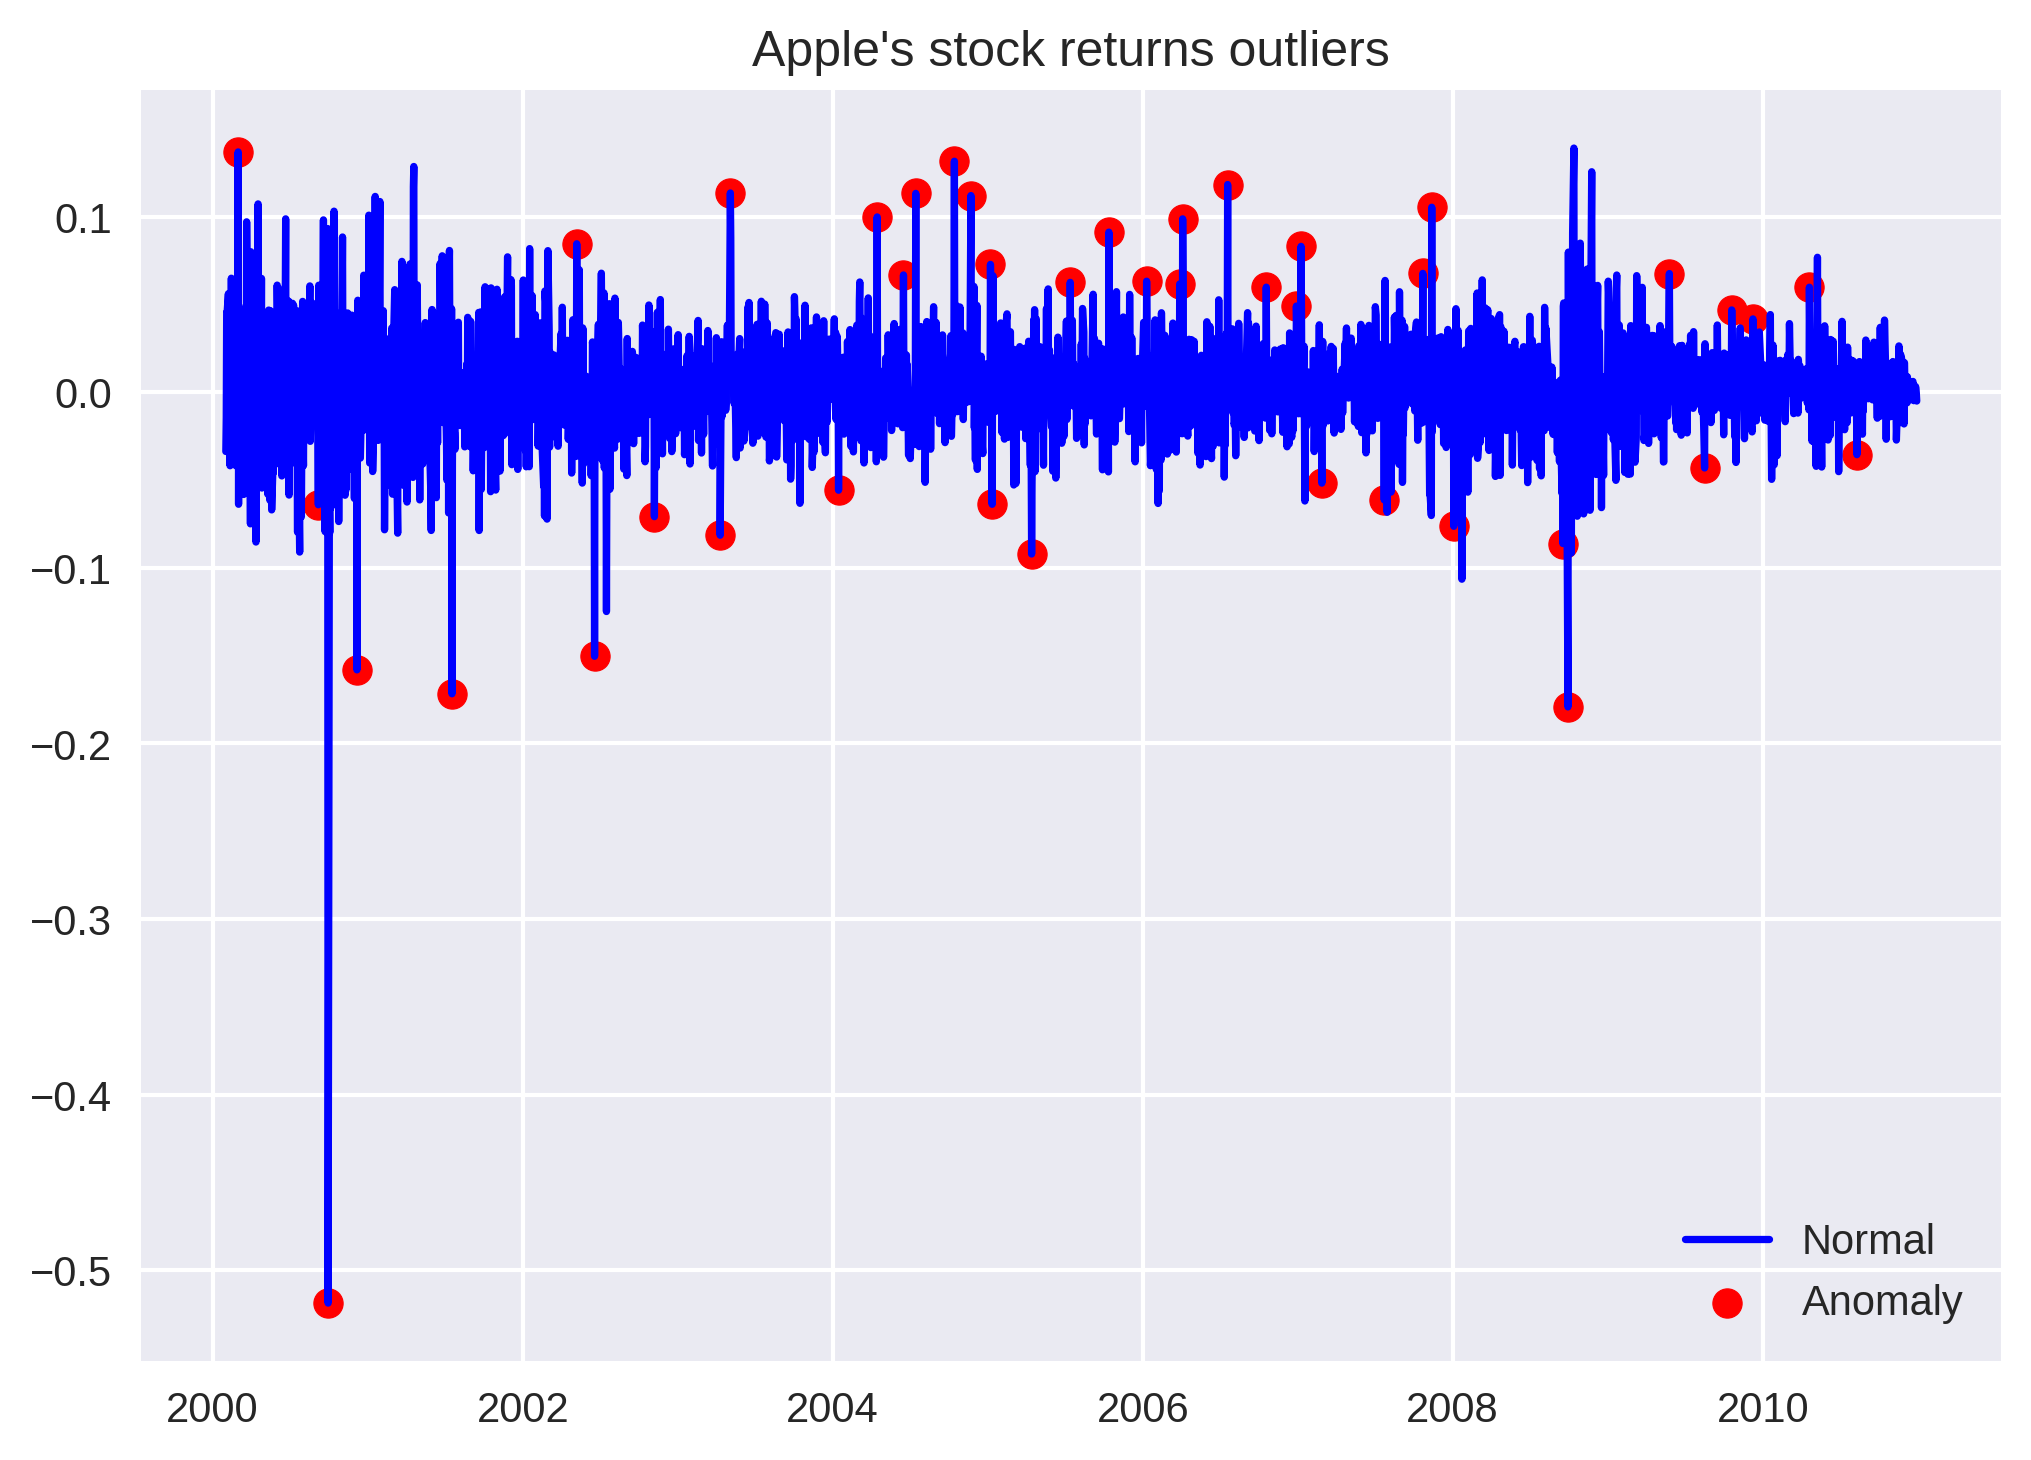

In [9]:
fig, ax = plt.subplots()
ax.plot(d1.index, d1.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns outliers")
ax.legend(loc='lower right')

需要注意的一件事是，当附近有相当多的大回报时，算法将第一个识别为异常值，将第二个识别为常规观察值（如圆圈所示）。这可能是由于第一个异常值进入滚动窗口并影响移动平均值/标准差。